<div dir="rtl">
    <div style="text-align: center;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">بسمه تعالی</h1>
</div>

<h1 align="left">🌟 Project Title:</h1>
<h3 align="center">🚀 <b>Intelligent Oil Price Prediction Using Advanced Machine Learning Models and Neural Networks</b></h3>

<div style="text-align: center;">
    <a href="https://github.com/M-RezaeiGH">
        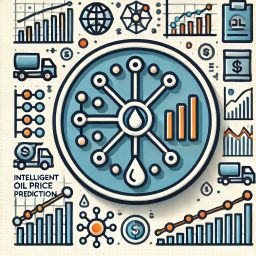
    </a>
</div>

<br><hr><br>

<h1 align="left">👨‍💻 Developer:</h1>
<h3 align="left">*** Mohammad Reza Rezaei ***</h3>

<div align="left">
  🔗 <a href="https://www.linkedin.com/in/m-rezaei/">LinkedIn</a> | 
  📂 <a href="https://github.com/M-RezaeiGH">GitHub</a>
</div>


##

## 📊 Dataset Introduction:
The dataset contains **1,262,329 rows** of real crude oil price data, which includes the following columns:

1. 📅 **DATE**: The date corresponding to the oil price.
2. ⏰ **TIME**: The time associated with the oil price.
3. 💰 **OPEN**: The opening price of oil at a specific time.
4. 📈 **HIGH**: The highest price of oil at a specific time.
5. 📉 **LOW**: The lowest price of oil at a specific time.
6. 🔒 **CLOSE**: The closing price of oil at a specific time.
7. 🔄 **TICKVOL**: The number of times the price of an asset (oil) has changed within a specific time frame. Higher TICKVOL indicates more price volatility and higher trading volume.
8. 📦 **VOL**: The total number of units of oil (barrels) traded within a specific time frame. VOL is crucial for determining the strength of a trend.
9. 📊 **SPREAD**: The difference between the bid price and the ask price at a given time. Values of 0, 1, and 2 indicate different spread levels (0 for tight, 1 for medium, 2 for wider spread).


##

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-weight: bold;">&star; Step 3: Feature Engineering and Data Cleaning </h1>
    </div>
</div>

### Notebook Description:

 The goal of this step is to perform preprocessing and data cleaning, check stationarity, and create an effective database for applying algorithms to make predictions.

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Installation: </h1>
    </div>
</div>

In [1]:
#!pip install klib
# !pip install --upgrade statsmodels
# !pip install adtk #anomaly detection model for time series with ADTK
# !pip install ydata-profiling

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Import Necessary Libraries: </h1>
    </div>
</div>

In [1]:
from src import DATA_DIR
import pandas as pd
import numpy as np
from numpy import where
from datetime import datetime
import klib
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import probplot
from scipy import stats
from pylab import rcParams
from plotly import tools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.stattools import eacf
# from pmdarima.arima import ndiffs, nsdiffs, EACF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import InterQuartileRangeAD

import ydata_profiling as ydp
import ydata_profiling
import pkg_resources
import IPython
import warnings
warnings.filterwarnings('ignore')
# اصلاح خطاها در کتابخانه Numba
from numba import jit

C:\Users\mbare\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

C:\Users\mbare\AppData\Local\Programs\Python\Python310\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Version Auto-Code: </h1>
    </div>
</div>

In [3]:
import pkg_resources

def get_package_version(package_name):
    try:
        package_version = pkg_resources.get_distribution(package_name).version
        return package_version
    except pkg_resources.DistributionNotFound:
        return None

imported_libraries = ['numpy', 'pandas','seaborn','matplotlib','scipy','plotly','IPython','numba','statsmodels','adtk',
                     'klib','ydata_profiling']

for library in imported_libraries:
    version = get_package_version(library)
    if version:
        print(f"{library}: {version}")
    else:
        print(f"{library}: Not found")

numpy: 1.23.5
pandas: 1.5.3
seaborn: 0.12.2
matplotlib: 3.6.3
scipy: 1.9.3
plotly: 5.23.0
IPython: 8.11.0
numba: 0.57.0
statsmodels: 0.13.5
adtk: 0.6.2
klib: 1.1.2
ydata_profiling: 4.1.2


##

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Read Data from my SRC folder: </h1>
    </div>
</div>

In [5]:
df = pd.read_csv(file_path, parse_dates=True, squeeze=True)

print(df.shape)
df.head()

(1262327, 9)


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2006.02.03,00:00:00,64.77,65.48,63.93,65.37,251,0,0
1,2006.02.06,00:00:00,66.35,66.50,64.77,65.11,223,0,0
2,2006.02.07,00:00:00,64.84,64.90,62.81,63.09,244,0,0
3,2006.02.08,00:00:00,62.96,63.44,62.29,62.55,190,0,0
4,2006.02.09,00:00:00,62.68,63.73,62.38,62.62,265,0,0


# Combine DATE+TIME:

In [6]:
df.columns = df.columns.str.replace('<', '').str.replace('>', '')
df['DATE'] = df['DATE'].str.replace('.','-')
df['DATE'] = df['DATE'] +'  ' + df['TIME']
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.drop(['TIME'], axis=1)
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2006-02-03,64.77,65.48,63.93,65.37,251,0,0
1,2006-02-06,66.35,66.50,64.77,65.11,223,0,0
2,2006-02-07,64.84,64.90,62.81,63.09,244,0,0
3,2006-02-08,62.96,63.44,62.29,62.55,190,0,0
4,2006-02-09,62.68,63.73,62.38,62.62,265,0,0


# Defining Categorical Features :

In [7]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

[]


In [8]:
df.info()
# datetime64[ns] --> nanosecond

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262327 entries, 0 to 1262326
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   DATE     1262327 non-null  datetime64[ns]
 1   OPEN     1262327 non-null  float64       
 2   HIGH     1262327 non-null  float64       
 3   LOW      1262327 non-null  float64       
 4   CLOSE    1262327 non-null  float64       
 5   TICKVOL  1262327 non-null  int64         
 6   VOL      1262327 non-null  int64         
 7   SPREAD   1262327 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 77.0 MB


In [9]:
# first day and last day of the DATE column:

##way1:
min_date = df['DATE'].min()
max_date = df['DATE'].max()
print(f"محدوده تاریخ: {min_date} تا {max_date}")

#way2:
df['DATE'].describe(datetime_is_numeric = True)

محدوده تاریخ: 2006-02-03 00:00:00 تا 2020-09-29 14:34:00


count                          1262327
mean     2018-08-02 12:07:40.051414016
min                2006-02-03 00:00:00
25%                2017-07-06 21:30:30
50%                2018-08-21 15:41:00
75%                2019-09-16 15:37:30
max                2020-09-29 14:34:00
Name: DATE, dtype: object

#

<div dir="ltr";style="text-align: left;">
        <h1 style="font-weight: bold;">&star;Pre-Processing_Cleaning_Feature Engineering:
        </h1>
</div>

<div dir="ltr";style="text-align: left;">
        <h1 style="font-weight: bold;"> &#10004; Missing Value Management:</h1>
</div>

## &bull; Missing Value Detection : 

In [15]:
num_nans = df.isnull().sum(axis = 0)
num_nans

DATE       0
OPEN       0
HIGH       0
LOW        0
CLOSE      0
TICKVOL    0
VOL        0
SPREAD     0
dtype: int64

In [16]:
df.dropna(inplace=True)

### &#9899; Result: 
## we have no missing value in dataset

#

<div dir="ltr";style="text-align: left;">
        <h1 style=" font-weight: bold;"> &#10004;Outlier Values Detection:</h1>
</div>

## 1) Visualization - Outlier Detection:

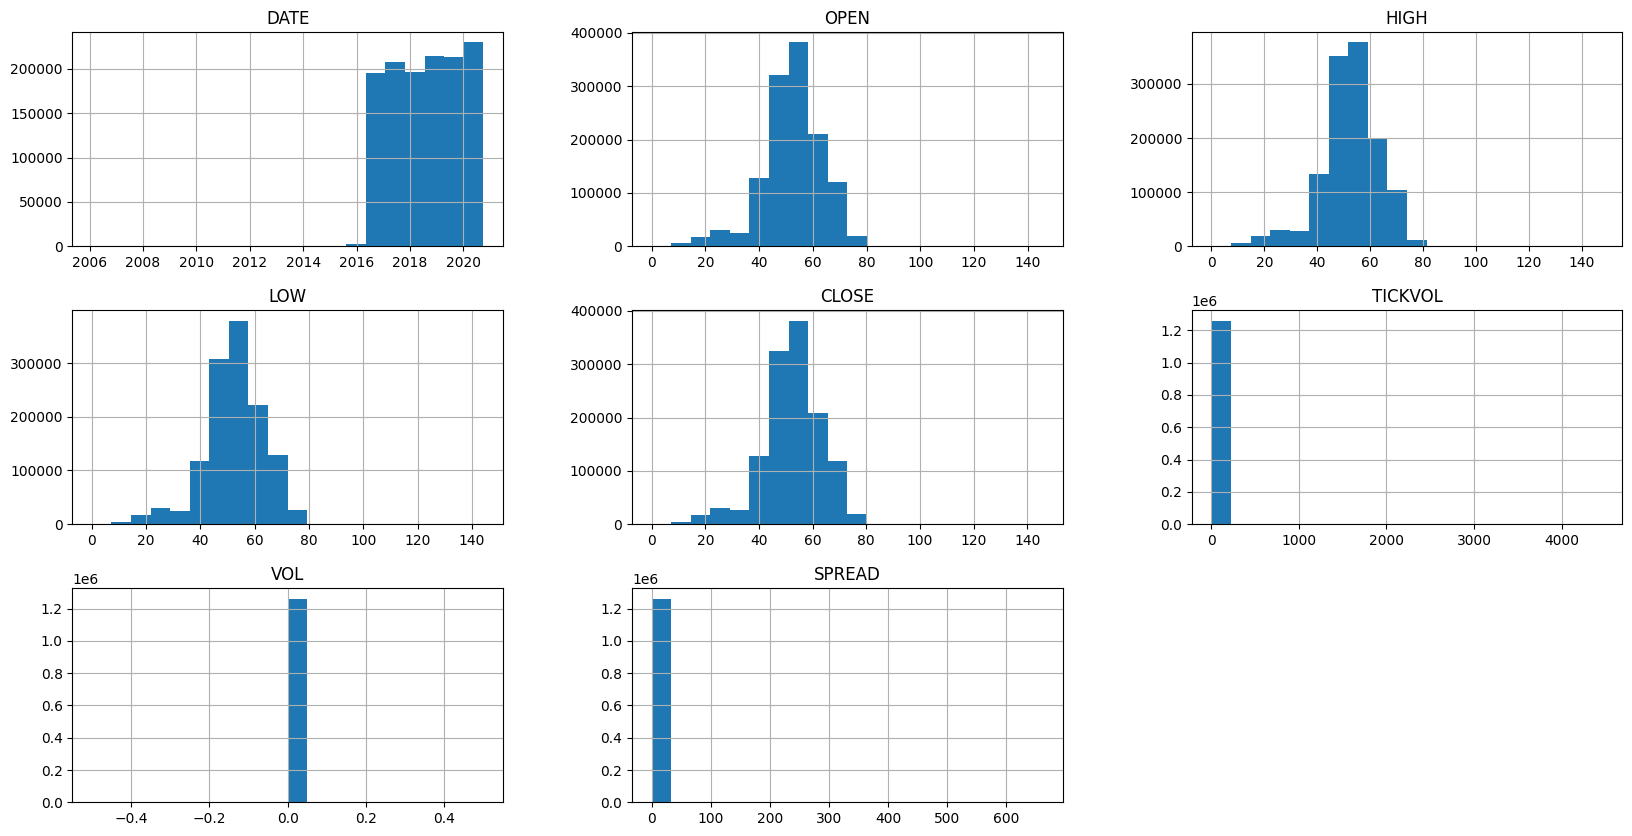

In [17]:
df.hist(bins = 20, figsize =(20, 10))
plt.show()

### &#9899; Result: 
We can see some feature are skewed and probably have some outliers.

## 2) Detection of normal or Dis-normal distribution of features :

In [18]:
# from scipy.stats import skew
# we don't mentioned 'DATE' due to dtype('<M8[ns]'):
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    skewness = skew(df[col])
    if skewness == 0:
        print("Data in column {} follows a normal distribution".format(col))
    elif skewness > 0:
        print("Data in column {} has a right-skewed distribution".format(col))
    else:
        print("Data in column {} has a left-skewed distribution".format(col))

Data in column OPEN has a left-skewed distribution
Data in column HIGH has a left-skewed distribution
Data in column LOW has a left-skewed distribution
Data in column CLOSE has a left-skewed distribution
Data in column TICKVOL has a right-skewed distribution
Data in column VOL has a left-skewed distribution
Data in column SPREAD has a right-skewed distribution


#### &#9899;Result:
Based on the results , mentioned above features have a non-normal distribution.

## 3-1) Q-Q Plot for all Feature instead of CLOSE:

<div dir="ltr">
    <div style="text-align: left;">
        <h2 style="text-align: left; font-weight: bold;">Q-Q Plot and Detecting Non-Normal Distribution with Images</h2>
        <p style="font-size: 18px; text-align: left;">
        The Q-Q Plot (Quantile-Quantile Plot) is a powerful graphical tool for comparing the distribution of a dataset with a theoretical distribution (usually a normal distribution). This plot helps us determine whether our data approximately follows a normal distribution or not.
        </p>
        <p style="font-size: 18px; text-align: left;"><strong>How to Interpret a Q-Q Plot:</strong></p>
        <ul style="font-size: 18px; text-align: left;">
            <li><strong>Straight Line:</strong> If the points on the Q-Q plot approximately lie on a straight line, it indicates that your data follows the theoretical distribution (here, the normal distribution).</li>
            <li><strong>Deviation from the Straight Line:</strong> If the points deviate from the straight line, it suggests that your data differs from the theoretical distribution. These deviations can appear in various forms, each indicating a specific type of deviation from normality.</li>
        </ul>
        <p style="font-size: 18px; text-align: left;"><strong>Types of Deviations from Normality in a Q-Q Plot:</strong></p>
        <ul style="font-size: 18px; text-align: left;">
            <li><strong>Heavy Tails:</strong> If the points deviate from the straight line at both ends of the plot (the tails), it indicates that your data contains more outliers than a normal distribution.</li>
            <li><strong>Light Tails:</strong> If the points are closer to the straight line at both ends, it indicates that your data has fewer outliers compared to a normal distribution.</li>
            <li><strong>Skewness:</strong> If the points curve upward or downward on one side of the straight line, it indicates that your data is skewed (i.e., the larger or smaller values are concentrated away from the mean).</li>
            <li><strong>Kurtosis:</strong> If the points are closer to the straight line in the middle and deviate at the ends, it indicates that your data has either sharper peaks (leptokurtic) or flatter peaks (platykurtic) compared to a normal distribution.</li>
        </ul>
    </div>
</div>


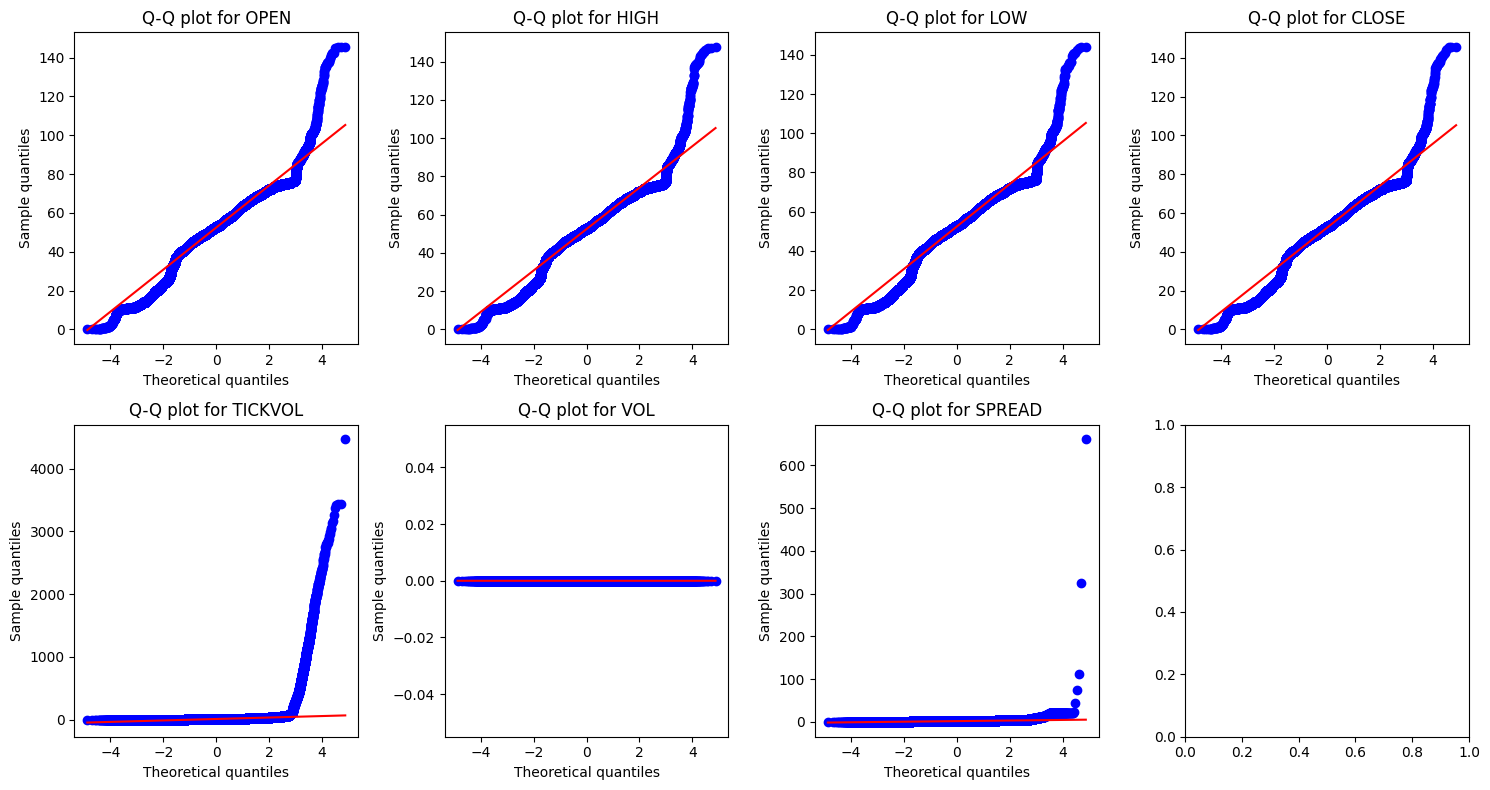

In [19]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Select numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['number']).columns

# Define the number of rows and columns for subplots
num_rows = 2  # Adjust the number of rows
num_cols = len(numeric_columns) // 2 + len(numeric_columns) % 2  # Handle odd/even number of columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Generate Q-Q plots for each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]  # Locate subplot based on index
    probplot(df[column], dist="norm", plot=ax)  # Generate Q-Q plot
    ax.set_title(f'Q-Q plot for {column}')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Sample quantiles')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## 3-2) Q-Q Plot for CLOSE Feature:

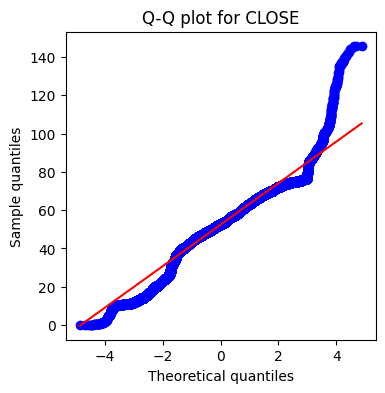

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
probplot(df['CLOSE'], plot=ax)
ax.set_title('Q-Q plot for CLOSE')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Sample quantiles')
plt.show()

#

<div dir="ltr" style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star; Analysis of the Impact of Other Columns on the DATE Column:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 16px; text-align: justify;">
    </p>
</div>


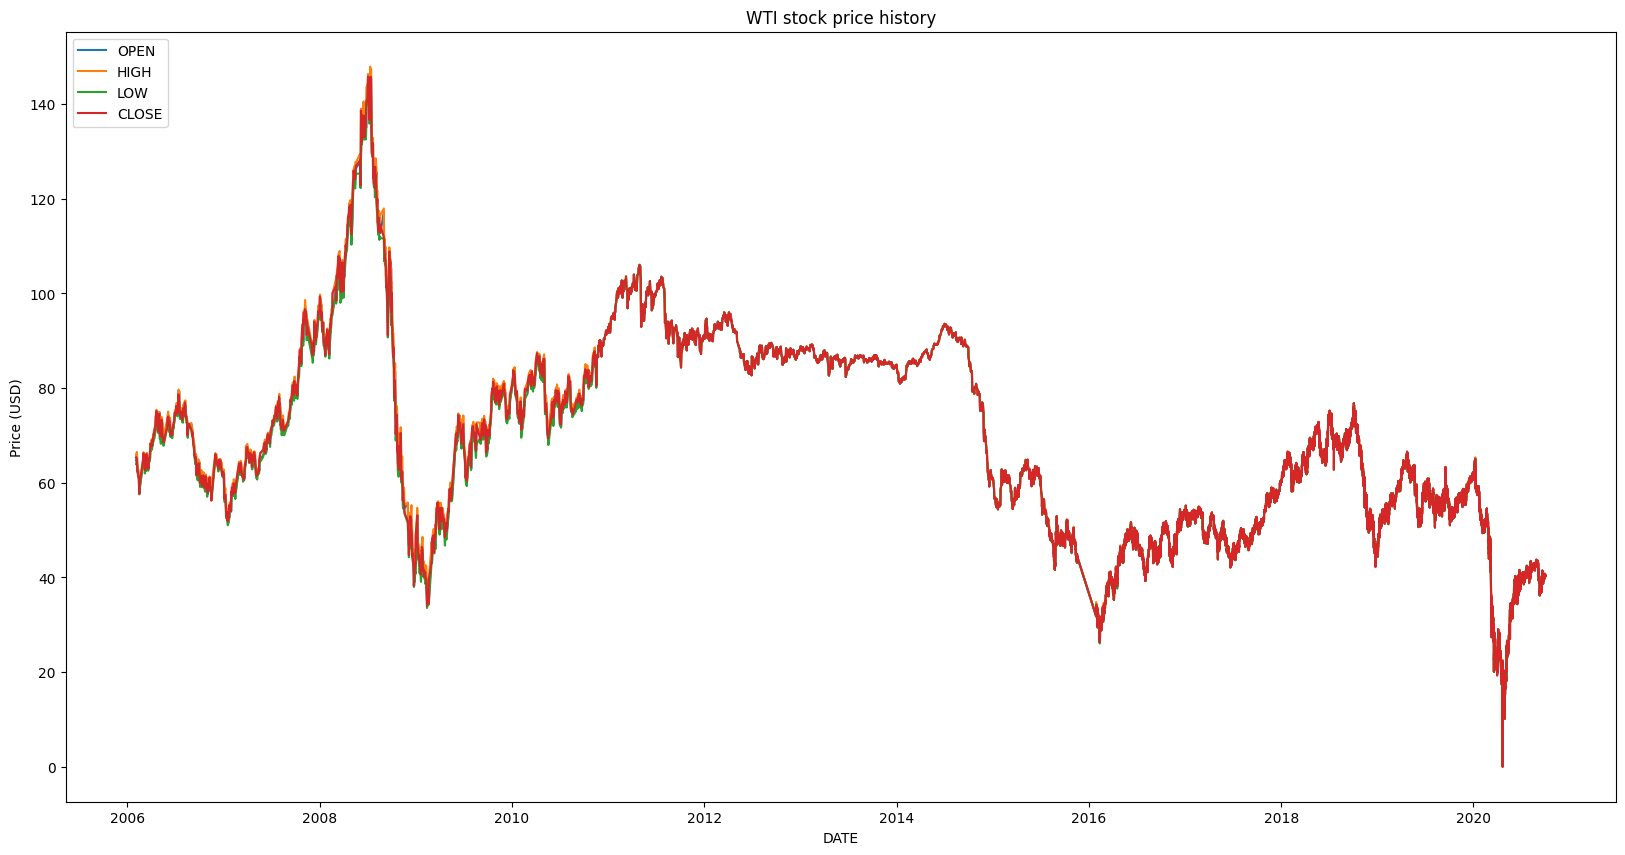

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(df["DATE"], df["OPEN"])
plt.plot(df["DATE"], df["HIGH"])
plt.plot(df["DATE"], df["LOW"])
plt.plot(df["DATE"], df["CLOSE"])
plt.title('WTI stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('DATE')
plt.legend(['OPEN', 'HIGH', 'LOW', 'CLOSE'], loc='upper left')
plt.show()

# &#9899; Result:
### So we see that columns of " open, high, low " and close prices don’t vary too much
#### **<span style="color: red; font-weight: bold;">* in the basis of this result, we consider two column of DATE and CLOSE as much important features which effect our algorithms.*</span>**


#

<div dir="ltr">
    <div style="text-align: left;">
        <h1 style="font-weight: bold;">
            2- Dropping features and continuing with two columns: DATE and CLOSE:
        </h1>
    </div>
</div>


In [22]:
# بر اساس كامنت بالا
# حذف ستونهاي اضافي 
df = df.drop(columns=['OPEN', 'HIGH', 'LOW', 'TICKVOL', 'VOL', 'SPREAD'])
df.head()

,DATE,CLOSE
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-weight: bold;">
            3- Moving the DATE column to Index:
        </h1>
    </div>
</div>


In [23]:
df.set_index("DATE", inplace=True)
df.head()

,CLOSE
DATE,
2006-02-03,65.37
2006-02-06,65.11
2006-02-07,63.09
2006-02-08,62.55
2006-02-09,62.62


<div dir="ltr">
    <div style="text-align: left;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">
            4- Time Series Validation with the ADTK Library:
        </h1>
    </div>
    <div style="font-family: 'B Nazanin', sans-serif; font-size: 20px;">
        **ADTK (Anomaly Detection Toolkit) Library:** A powerful tool for detecting anomalies in time series data.
        <br>
        It is recommended to perform this validation after handling outliers as well.
        <br>
        Website: <a href="https://adtk.readthedocs.io/en/stable/" target="_blank">ADTK Documentation</a>
    </div>
</div>


<h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">Functionality of the validate_series function:</h1>

<div style="font-size: 20px;">
    <b>Checking for missing values (NaN):</b> It checks if there are any missing values in the data.
    <br>
    <b>Data type verification:</b> Ensures that the data is numeric.
    <br>
    <b>Uniform time interval check:</b> Verifies that the time intervals between data points are consistent.
    <br>
    <b>Detecting extreme outliers:</b> It may use methods such as Z-score or interquartile range to detect extreme outliers.
    <br>
    <b>General trend analysis:</b> It may examine whether the data is increasing, decreasing, or stable over time.
    <br>
    <b>Returning results:</b> The function usually returns a Boolean output (True or False) indicating whether the time series is valid. It may also return additional information such as the number of missing values, outliers, etc.
</div>


##

<h1 style=" font-size:28px;">4-1- Time Series Validation Review</h1>

In [24]:
# from adtk.data import validate_series
is_valid = validate_series(df)
if is_valid.all().all():
    print("سری زمانی معتبر است.")
else:
    print("سری زمانی دارای مشکل است.")


سری زمانی معتبر است.


[<AxesSubplot: >]

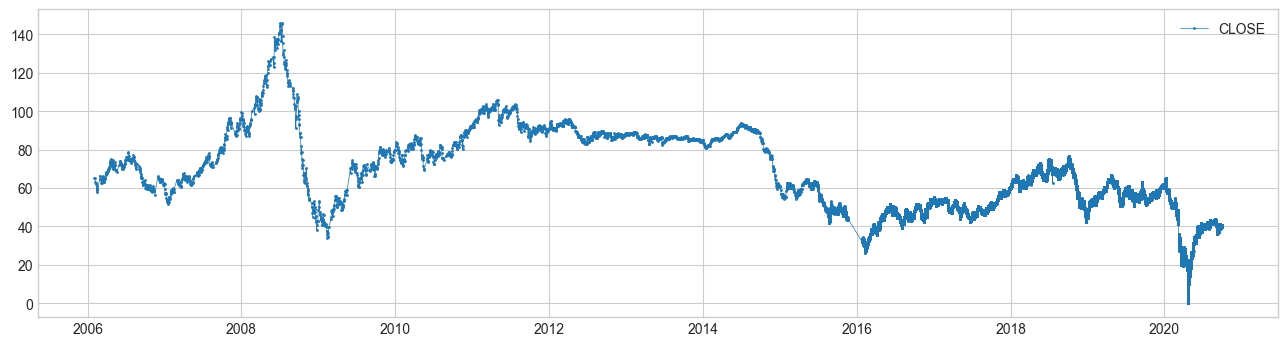

In [25]:
# from adtk.visualization import plot
plot(df)

#

<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-size:28px;">4-2- ThresholdAD Approach For Outlier Detection</h1>
    </div>
</div>

In [26]:
print('Average closing price', df['CLOSE'].mean())
print('Minimum closing price', df['CLOSE'].min())
print('Maximum closing price',df['CLOSE'].max())

Average closing price 52.46557928333943
Minimum closing price 0.01
Maximum closing price 145.86


In [27]:
from adtk.detector import ThresholdAD
# محاسبه چارک اول و سوم
Q1 = df['CLOSE'].quantile(0.25)
Q3 = df['CLOSE'].quantile(0.75)
IQR = iqr(df['CLOSE'])
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR
threshold_val = ThresholdAD(high=upper_limit, low=lower_limit)
anomalies_thresh = threshold_val.detect(df['CLOSE'])
anomalies_thresh.value_counts()

False    1261913
True         414
Name: CLOSE, dtype: int64

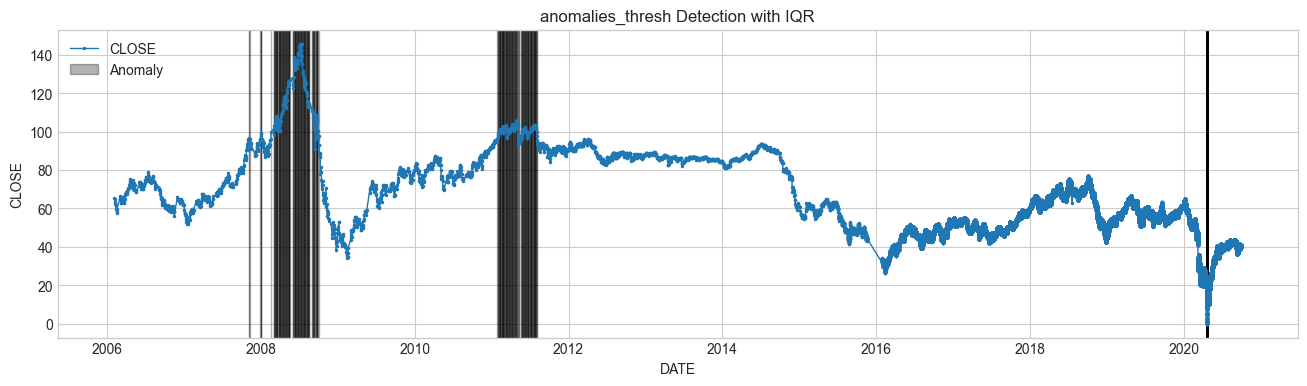

In [28]:
# from adtk.visualization import plot
plot(df, anomaly=anomalies_thresh, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='black')
plt.title('anomalies_thresh Detection with IQR')
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.legend()
plt.show()

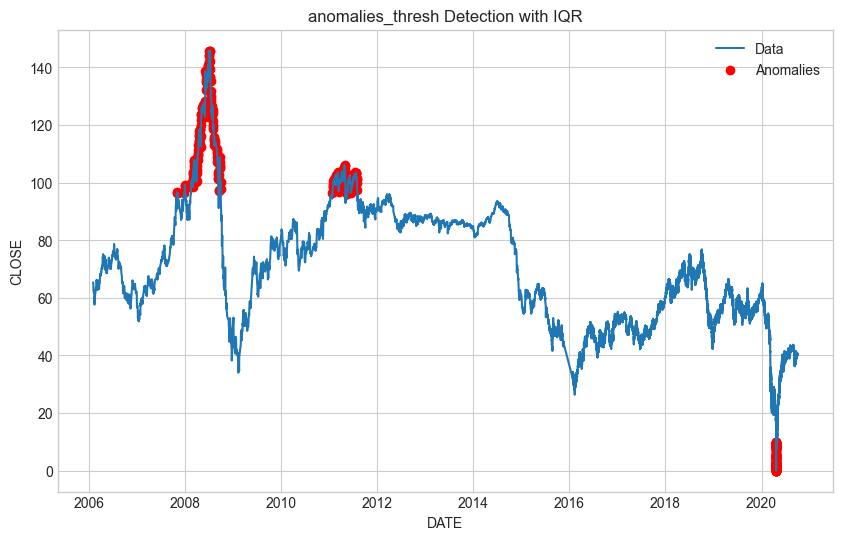

In [29]:
import matplotlib.pyplot as plt

plt.plot(df['CLOSE'], label='Data')
plt.scatter(df.index[anomalies_thresh], df['CLOSE'][anomalies_thresh], color='red', label='Anomalies')
plt.title('anomalies_thresh Detection with IQR')
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.legend()
plt.show()


<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-size:30px;">4-3- InterQuartileRangeAD Approach For Outlier Detection</h1>
    </div>
</div>

<div style="text-align: left; font-size: 18px;">
    <div><b>InterQuartileRangeAD:</b> This class from the ADTK library creates an anomaly detector based on the IQR method.</div>
    <div><b>c=3:</b> The parameter 'c' is a multiplier used to set the threshold for detecting outliers. Its default value is 1.5. Increasing this value makes the threshold stricter, leading to fewer detected outliers. In this example, setting c=3 results in a relatively strict threshold.</div>
    <div><b>Data type verification:</b> Ensures that the data is numeric.</div>
    <div><b>anomalies:</b> A variable that stores the results of the anomaly detection. It is usually a Boolean time series where True indicates an outlier and False indicates normal data.</div>
    <div><b>fit_detect:</b> This method first trains the anomaly detection model on the input data (fit), and then detects outliers in the data (detect).</div>
</div>


In [31]:
# Import the InterQuartileRangeAD class from the ADTK library
from adtk.detector import InterQuartileRangeAD

# Initialize a list to store columns with anomalies
anomaly_columns = []

# Loop through each column in the dataframe
for column in df.columns:
    iqr_ad = InterQuartileRangeAD(c=3)  # Create an IQR anomaly detector with a stricter threshold (c=3)
    anomalies = iqr_ad.fit_detect(df[column])  # Fit and detect anomalies in the column

    # If any anomalies are found, append the column name to the list
    if anomalies.any():
        anomaly_columns.append(column)

# Print the columns that contain anomalies
print("Columns containing anomalies:")
print(anomaly_columns)

# Display the detected anomalies
anomalies

ستون‌های حاوی آنومالی:
['CLOSE']


DATE
2006-02-03 00:00:00    False
2006-02-06 00:00:00    False
2006-02-07 00:00:00    False
2006-02-08 00:00:00    False
2006-02-09 00:00:00    False
                       ...  
2020-09-29 14:30:00    False
2020-09-29 14:31:00    False
2020-09-29 14:32:00    False
2020-09-29 14:33:00    False
2020-09-29 14:34:00    False
Name: CLOSE, Length: 1262327, dtype: bool

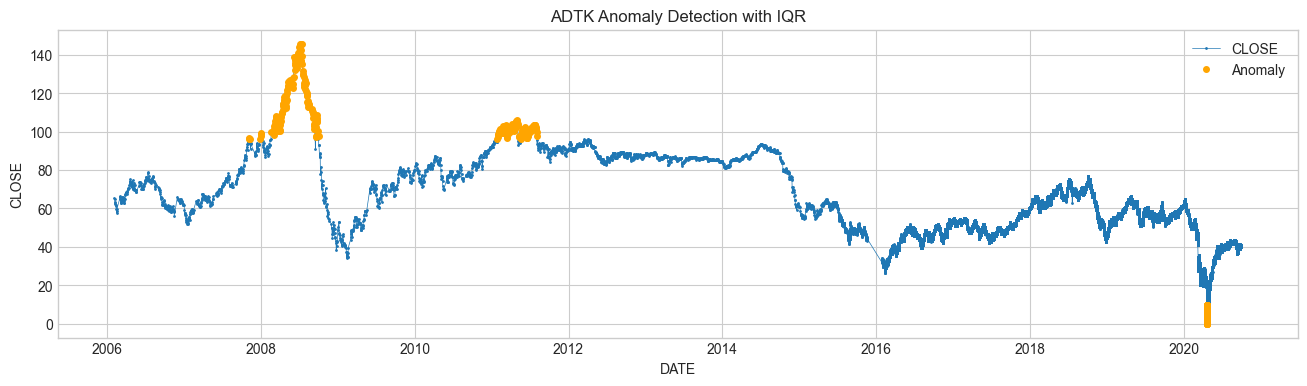

In [32]:
plot(df, anomaly=anomalies, anomaly_color="orange", anomaly_tag="marker")
plt.title('ADTK Anomaly Detection with IQR')
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.legend()
plt.show()

<div dir="rtl">
    <div style="text-align: RIGHT;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-size:28px;">4-4- IQR For Outlier Detection:</h1>
    </div>
</div>

In [33]:
# from scipy.stats import iqr
# Old Approach for Outlier Detection:

numeric_cols = df.select_dtypes(include=['int64', 'float64','datetime64[ns]']).columns
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = iqr(df[col])
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    col_outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    if not col_outliers.empty:
        outliers[col] = col_outliers.shape[0]

if len(outliers) > 0:
    print("Outliers have been detected in the following columns:")
    for col, count in outliers.items():
        print(f"{col}: {count} outliers")
else:
    print("No outliers have been detected in the data.")

Outliers have been detected in the following columns:
CLOSE: 414 outliers


#

<div style="text-align: left;">
    <h1 style=" font-weight: bold; display: inline;">5- Outlier Management Strategy:</h1>
</div>
<br/>
<p style="font-family: 'B Nazanin', sans-serif; font-size: 20px; text-align: justify;">
   An outlier is a large, real value, while noise is an unrealistic and erroneous value. 
   Our data likely contains large, real values, and whenever necessary, the mean is used instead of the median. 
   Initially, InterQuartileRangeAD is used to detect outliers. Then, outliers are replaced with the mean of the neighboring values or the preceding and following data points.
   <br/>    
</p>


<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-size:25px;">5-1- Manage outliers in CLOSE column with ADTK Approach:</h1>
    </div>
</div>

In [34]:
# from adtk.detector import InterQuartileRangeAD
# from adtk.data import validate_series

# df = validate_series(df)

# # استفاده از InterQuartileRangeAD برای تشخیص داده‌های پرت
# iqr_ad = InterQuartileRangeAD(c=3)
# anomalies = iqr_ad.fit_detect(df["CLOSE"])

# Calculate the moving average with a window of 12
# min_periods=1: If only one value is present in the window, the average of that single value will be returned. This is necessary for the beginning of the dataframe.
rolmean = df["CLOSE"].rolling(window=12, min_periods=1).mean()

# Create a new column for the cleaned data
df["CLOSE_cleaned"] = df["CLOSE"].copy()

# Replace outlier values with the moving average
df.loc[anomalies == True, "CLOSE_cleaned"] = rolmean.loc[anomalies == True]

# Display the original and cleaned data
print(df[["CLOSE", "CLOSE_cleaned"]])



                     CLOSE  CLOSE_cleaned
DATE                                     
2006-02-03 00:00:00  65.37          65.37
2006-02-06 00:00:00  65.11          65.11
2006-02-07 00:00:00  63.09          63.09
2006-02-08 00:00:00  62.55          62.55
2006-02-09 00:00:00  62.62          62.62
...                    ...            ...
2020-09-29 14:30:00  40.27          40.27
2020-09-29 14:31:00  40.28          40.28
2020-09-29 14:32:00  40.25          40.25
2020-09-29 14:33:00  40.26          40.26
2020-09-29 14:34:00  40.26          40.26

[1262327 rows x 2 columns]


In [35]:
df[df['CLOSE']!= df['CLOSE_cleaned']]

,CLOSE,CLOSE_cleaned
DATE,,
2007-11-06 00:00:00,96.70,91.604167
2007-11-07 00:00:00,96.37,92.466667
2007-11-09 00:00:00,96.32,94.084167
2007-12-27 00:00:00,96.27,92.462500
2008-01-02 00:00:00,99.33,93.689167
...,...,...
2020-04-21 21:08:00,9.75,9.567500
2020-04-21 21:09:00,9.63,9.610000
2020-04-21 21:10:00,9.85,9.715833


<div dir="ltr">
    <div style="text-align: left;">
        <h1 style=" font-size:25px;">5-2-Plot Anomalise after Outelier Management:</h1>
    </div>
</div>

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

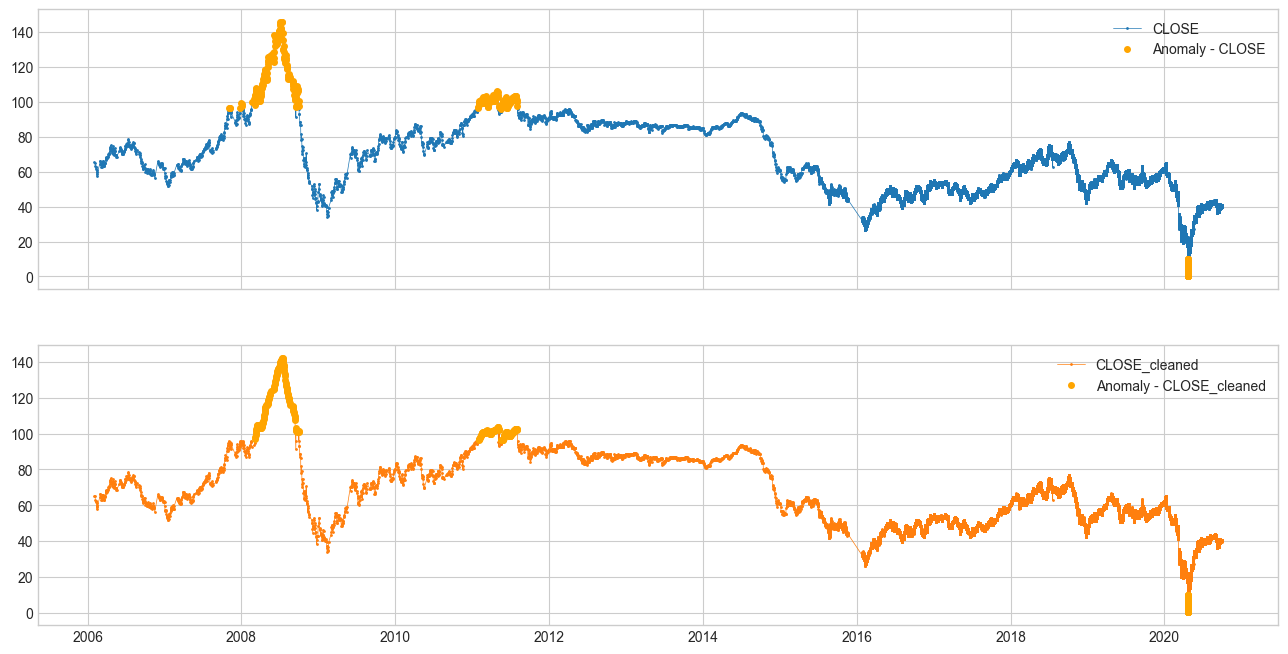

In [36]:
# Anomaly Detection:
iqr_ad = InterQuartileRangeAD(c=3)
anomalies = iqr_ad.fit_detect(df)
plot(df, anomaly=anomalies, anomaly_color="orange", anomaly_tag="marker")

<div style="text-align: left;">
    <h1 style=" font-size:25px;">5-3- Manage Outliers in CLOSE Column with IQR- Mean:</h1>
</div>
<div style="text-align: left;">
    <h1 style=" font-size:16px;">&#10004;  The method below was not used and is only presented as a suggestion.</h1>
</div>


In [37]:

# # جایگزینی مقادیر پرت با میانگين ستون 
# # mean = np.mean(df1['CLOSE'])          # استفاده در داده نرمال
# rolmean = df.rolling(window=12).mean() # استفاده در داده غيرنرمال

# outliers = df[(df['CLOSE'] < lower_limit) | (df['CLOSE'] > upper_limit)]
# df1.loc[outliers.index, 'CLOSE'] = rolmean
# print(Q1)
# print(Q3)

In [38]:
print(df["CLOSE"].isna().sum())

0


<div style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-size:25px;">5-4- Replacing CLOSE_cleaned Column with CLOSE Column</h1>
</div>
<div style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-size:16px;">&#10004;  The column where outliers were managed has been replaced with the CLOSE column.</h1>
</div>


In [39]:
df.drop(columns=["CLOSE"], inplace=True)
df.rename(columns={"CLOSE_cleaned": "CLOSE"}, inplace=True)
df.head()

,CLOSE
DATE,
2006-02-03,65.37
2006-02-06,65.11
2006-02-07,63.09
2006-02-08,62.55
2006-02-09,62.62


<div style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&#9899; Result of Outlier Management:</h1>
    <p style="font-family: 'B Nazanin', sans-serif; font-size: 24px; text-align: justify;">
    Since outliers in time series data must be managed with caution, and considering that our data pertains to crude oil prices—which can experience significant increases or decreases over time—efforts were made to manage these data points more carefully.
    </p>
</div>


In [42]:
# df.to_csv('df_Step3_After_PreProcess.csv', index=True)

<div style="text-align: left;">
    <h1 style=" font-weight: bold;">&star; End of Step3: Feature Engineering and Data Cleaning</h1>
</div>
